In [2]:
# # Instalando o pacote para trabalhar com fuzzy
# !pip install scikit-fuzzy

# [Documentação](https://pythonhosted.org/scikit-fuzzy/api/api.html)

Antecedentes: Entradas

Consequente: Saída

In [3]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [4]:
qualidade = ctrl.Antecedent(np.arange(0, 11, 1), 'qualidade')
servico = ctrl.Antecedent(np.arange(0, 11, 1), 'servico')


In [5]:
qualidade

Antecedent: qualidade

In [6]:
gorjeta = ctrl.Consequent(np.arange(0, 21, 1), 'gorjeta')

# Membership functions

C:\Users\Bruno\Anaconda3\envs\ambiente\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


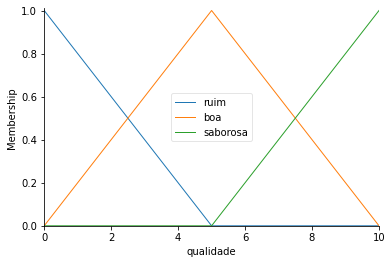

In [7]:
qualidade.automf(number=3, names=['ruim', 'boa', 'saborosa'])
servico.automf(number=3, names=['ruim', 'aceitavel', 'otimo'])
qualidade.view()

**obs: olhar esse [site](https://stackoverflow.com/questions/4930524/how-can-i-set-the-backend-in-matplotlib-in-python) depois**

In [8]:
gorjeta.universe

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20])

![](https://www.mathworks.com/help/examples/fuzzy/win64/PiShapedMembershipFunctionExample_01.png)

C:\Users\Bruno\Anaconda3\envs\ambiente\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


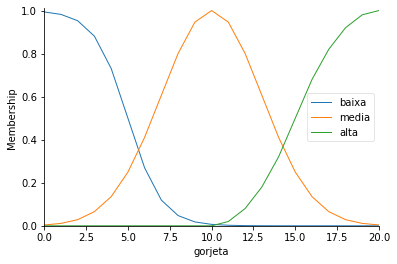

In [9]:
gorjeta['baixa'] = fuzz.sigmf(gorjeta.universe, 5, -1)
gorjeta['media'] = fuzz.gaussmf(gorjeta.universe, 10, 3)
gorjeta['alta'] = fuzz.pimf(gorjeta.universe, 10, 20, 25, 50)
gorjeta.view()

Para mais detalhes olhar o [exemplo1](https://scikit-fuzzy.readthedocs.io/en/latest/auto_examples/plot_tipping_problem_newapi.html) ou [exemplo2](https://pythonhosted.org/scikit-fuzzy/auto_examples/plot_control_system_advanced.html).

In [13]:
# Verificando a versão do matplotlib

import matplotlib as plt
print(plt.__version__)

3.4.3


In [ ]:
regra1 = ctrl.Rule(qualidade['ruim'] | servico['ruim'], gorjeta['baixa'])
regra2 = ctrl.Rule(servico['aceitavel'], gorjeta['media'])
regra3 = ctrl.Rule(servico['otimo'] | qualidade['saborosa'], gorjeta['alta'])

# regra1.view() -> para usar Downgrade matplotlib version to 2.2.3

# Sistema de controle

In [ ]:
sistema_controle = ctrl.ControlSystem([regra1, regra2, regra3])

In [ ]:
sistema = ctrl.ControlSystemSimulation(sistema_controle)

In [ ]:
sistema.input['qualidade'] = 9
sistema.input['servico'] = 9
sistema.compute()

In [ ]:
sistema

In [ ]:
sistema_controle

14.318368176197941


C:\Users\Bruno\Anaconda3\envs\ambiente\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


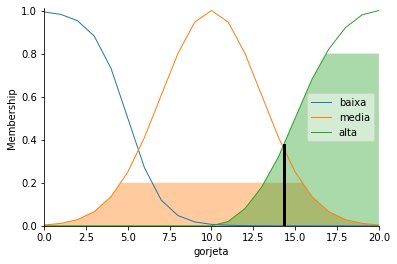

In [ ]:
print(sistema.output['gorjeta'])
gorjeta.view(sim=sistema)

In [ ]:
sistema

Para mais detalhes sobre defuzzificação conferir esse [link](https://pythonhosted.org/scikit-fuzzy/auto_examples/plot_defuzzify.html) e [esse](https://pythonhosted.org/scikit-fuzzy/api/skfuzzy.defuzzify.html).

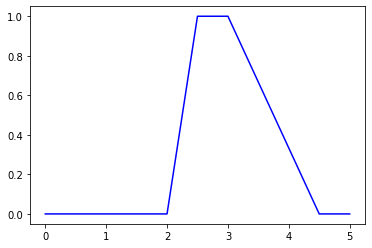

In [ ]:
import matplotlib.pyplot as plt

x  =  np.arange (0, 5.05,  0.1) 
mfx  =  fuzz.trapmf ( x ,  [2, 2.5, 3, 4.5])
defuzz_centroid = fuzz.defuzz(x, mfx, 'centroid') 
plt.plot(x, mfx, 'b', linewidth=1.5, label='Fuzzy Membership Function')


In [ ]:
defuzz_centroid

3.0555555555555554

In [ ]:
x  =  np.arange (0, 5.05,  0.1)
x

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
       3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. ])